ARP Spoofing Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [2]:
df = pd.read_csv("/content/ARP-dataset.csv")

In [3]:
df.head()


,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1711,0,0,0.0,306446,0


In [4]:
df.isnull().sum()

,0
switch_id,0
in_port,0
outport,0
src_mac_addr(eth),0
src_mac_addr(arp),532
dst_mac_addr(eth),0
dst_mac_addr(arp),533
src_ip(arp),0
dst_ip(arp),0
op_code(arp),0


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134000 entries, 0 to 133999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          134000 non-null  int64  
 1   in_port            134000 non-null  int64  
 2   outport            134000 non-null  int64  
 3   src_mac_addr(eth)  134000 non-null  object 
 4   src_mac_addr(arp)  133468 non-null  object 
 5   dst_mac_addr(eth)  134000 non-null  object 
 6   dst_mac_addr(arp)  133467 non-null  object 
 7   src_ip(arp)        134000 non-null  object 
 8   dst_ip(arp)        134000 non-null  object 
 9   op_code(arp)       134000 non-null  int64  
 10  packet_in_count    134000 non-null  int64  
 11  Protocol           134000 non-null  int64  
 12  Pkt loss           134000 non-null  int64  
 13  rtt (avg)          134000 non-null  float64
 14  total_time         134000 non-null  int64  
 15  Label              134000 non-null  int64  
dtypes:

In [6]:
df.describe()

,switch_id,in_port,outport,op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
count,134000.000000,134000.000000,1.340000e+05,134000.000000,134000.000000,134000.000000,134000.000000,134000.000000,1.340000e+05,134000.000000
mean,6.439604,3.190022,2.996541e+09,1.158112,38854.309813,0.003791,74.855224,0.011978,6.086558e+06,1.436149
std,3.793212,1.191286,1.972515e+09,0.382190,27955.590651,0.061455,43.384697,0.085225,1.372583e+07,0.865346
min,1.000000,1.000000,1.000000e+00,1.000000,1667.000000,0.000000,0.000000,0.000000,3.012470e+05,0.000000
25%,3.000000,2.000000,4.000000e+00,1.000000,14709.000000,0.000000,0.000000,0.000000,1.028649e+06,0.000000
50%,6.000000,4.000000,4.294967e+09,1.000000,29702.000000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
75%,10.000000,4.000000,4.294967e+09,1.000000,62417.250000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
max,13.000000,4.000000,4.294967e+09,4.000000,96543.000000,1.000000,100.000000,1.374000,4.712558e+07,2.000000


In [7]:
df['Label'].value_counts()


,count
Label,
2,92138
0,33694
1,8168


In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [9]:
X = df.drop('Label', axis=1)
y = df['Label']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9997388059701493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6739
           1       1.00      1.00      1.00      1634
           2       1.00      1.00      1.00     18427

    accuracy                           1.00     26800
   macro avg       1.00      1.00      1.00     26800
weighted avg       1.00      1.00      1.00     26800



In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6739
           1       1.00      1.00      1.00      1634
           2       1.00      1.00      1.00     18427

    accuracy                           1.00     26800
   macro avg       1.00      1.00      1.00     26800
weighted avg       1.00      1.00      1.00     26800



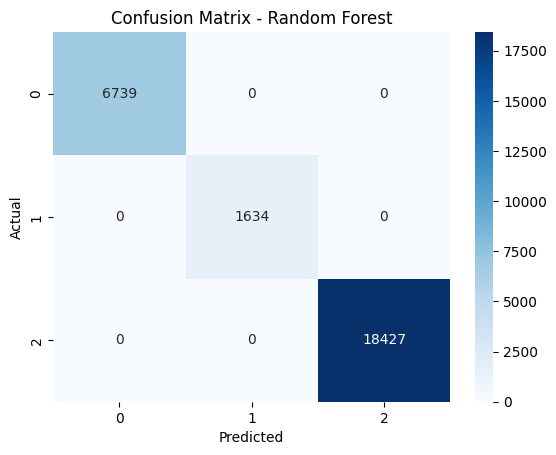

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


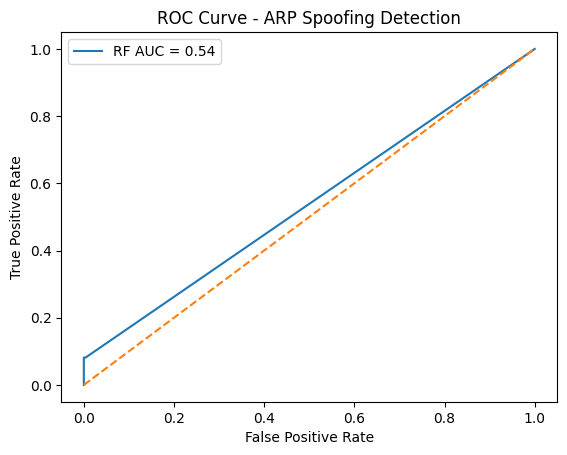

In [17]:
# Assuming your original labels are like 0=Normal, 1=Spoof, 2=Other attacks
y_test_binary = y_test.copy()
y_test_binary[y_test_binary != 0] = 1  # All attacks → 1
y_prob_rf_binary = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_binary, y_prob_rf_binary)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"RF AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ARP Spoofing Detection")
plt.legend()
plt.show()


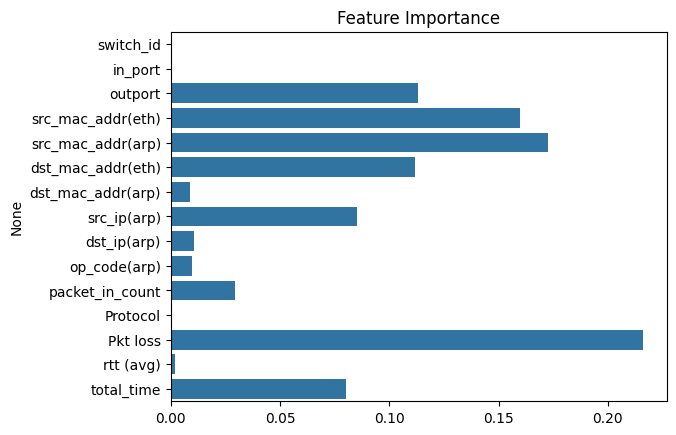

In [18]:
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_cv = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr_cv, X, y, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", lr_scores)
print("Mean Accuracy:", lr_scores.mean())

# Random Forest
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: [0.31597015 0.96011194 0.94488806 0.94488806 0.94436567]
Mean Accuracy: 0.8220447761194031
Random Forest CV Accuracy: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


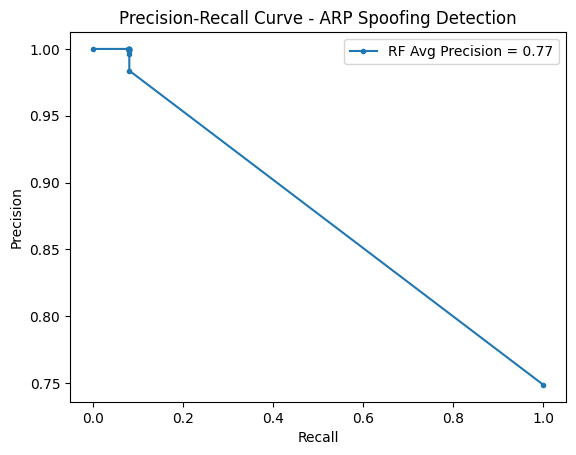

In [20]:
# Convert multiclass labels to binary
# 0 = Normal, 1 = Any type of attack
y_test_binary = y_test.copy()
y_test_binary[y_test_binary != 0] = 1

# Predict probabilities for the positive class
y_prob_rf_binary = rf.predict_proba(X_test)[:,1]

# Now compute Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test_binary, y_prob_rf_binary)
avg_precision = average_precision_score(y_test_binary, y_prob_rf_binary)

# Plot
import matplotlib.pyplot as plt
plt.plot(recall, precision, marker='.', label=f'RF Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ARP Spoofing Detection')
plt.legend()
plt.show()



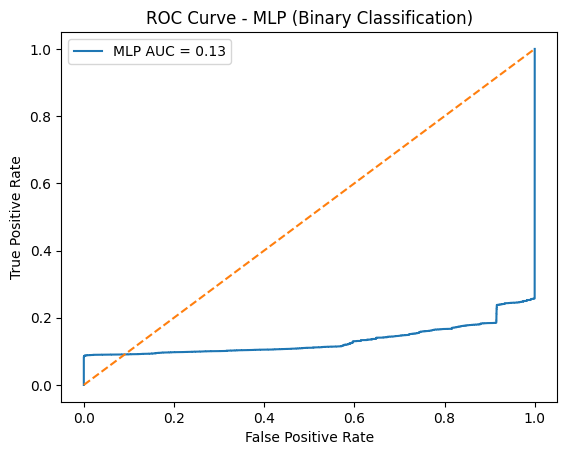

In [23]:
## ===============================
# MLP Binary ROC Curve (One Cell)
# ===============================

# Imports
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Train MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 2. Convert multiclass labels to binary
# Normal = 0, Any attack = 1
y_test_binary = y_test.copy()
y_test_binary[y_test_binary != 0] = 1

# 3. Predict probabilities for positive class
y_prob_mlp_binary = mlp.predict_proba(X_test_scaled)[:, 1]

# 4. Compute ROC curve and AUC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_binary, y_prob_mlp_binary)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# 5. Plot ROC Curve
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP AUC = {roc_auc_mlp:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP (Binary Classification)")
plt.legend()
plt.show()


In [24]:
# ================= Interactive Test for ARP Spoofing =================
import pandas as pd

print("===== ARP Spoofing Detection: Enter Packet Features =====")

# 1️⃣ Input all features (numeric / categorical)
switch_id = float(input("Enter switch_id: "))
in_port = float(input("Enter in_port: "))
outport = float(input("Enter outport: "))
src_mac_eth = float(input("Enter src_mac_addr(eth): "))
src_mac_arp = float(input("Enter src_mac_addr(arp): "))
dst_mac_eth = float(input("Enter dst_mac_addr(eth): "))
dst_mac_arp = float(input("Enter dst_mac_addr(arp): "))
src_ip_arp = float(input("Enter src_ip(arp): "))
dst_ip_arp = float(input("Enter dst_ip(arp): "))
op_code_arp = float(input("Enter op_code(arp): "))
packet_in_count = float(input("Enter packet_in_count: "))
Protocol = float(input("Enter Protocol: "))
Pkt_loss = float(input("Enter Pkt loss: "))
rtt_avg = float(input("Enter rtt (avg): "))
total_time = float(input("Enter total_time: "))

# 2️⃣ Create DataFrame with correct column order
new_packet = pd.DataFrame([{
    'switch_id': switch_id,
    'in_port': in_port,
    'outport': outport,
    'src_mac_addr(eth)': src_mac_eth,
    'src_mac_addr(arp)': src_mac_arp,
    'dst_mac_addr(eth)': dst_mac_eth,
    'dst_mac_addr(arp)': dst_mac_arp,
    'src_ip(arp)': src_ip_arp,
    'dst_ip(arp)': dst_ip_arp,
    'op_code(arp)': op_code_arp,
    'packet_in_count': packet_in_count,
    'Protocol': Protocol,
    'Pkt loss': Pkt_loss,
    'rtt (avg)': rtt_avg,
    'total_time': total_time
}])

# 3️⃣ Scale using the same scaler as training
new_packet_scaled = scaler.transform(new_packet)

# 4️⃣ Predict using Random Forest and MLP
rf_pred = rf.predict(new_packet_scaled)
mlp_pred = mlp.predict(new_packet_scaled)

# 5️⃣ Show results
print("\n===== Prediction Results =====")
print("Random Forest Prediction (0=Normal, 1=Attack):", rf_pred[0])
print("MLP Prediction (0=Normal, 1=Attack):", mlp_pred[0])



===== ARP Spoofing Detection: Enter Packet Features =====
Enter switch_id: 0.4
Enter in_port: 0.4
Enter outport: 0.4
Enter src_mac_addr(eth): 0.4
Enter src_mac_addr(arp): 0.4
Enter dst_mac_addr(eth): 0.4
Enter dst_mac_addr(arp): 0.4
Enter src_ip(arp): 0.4
Enter dst_ip(arp): 0.4
Enter op_code(arp): 0.4
Enter packet_in_count: 0.4
Enter Protocol: 0.4
Enter Pkt loss: 0.4
Enter rtt (avg): 0.4
Enter total_time: 0.4

===== Prediction Results =====
Random Forest Prediction (0=Normal, 1=Attack): 0
MLP Prediction (0=Normal, 1=Attack): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pickle

with open("mlp_model.pkl", "wb") as f:
    pickle.dump(mlp, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


print("✅ Saved model, scaler, and vectorizer as .pkl files")


✅ Saved model, scaler, and vectorizer as .pkl files
